# Implementing the Perceptron Algorithm

##### The following blog post will implement the perceptron algorithm using numerical programming to demonstrate its use on a variety of data sets. 

To view the source code containing the perceptron algorithm itself, pelase follow this link: 

### Introduction

First of all, what is the perceptron algorithm? 

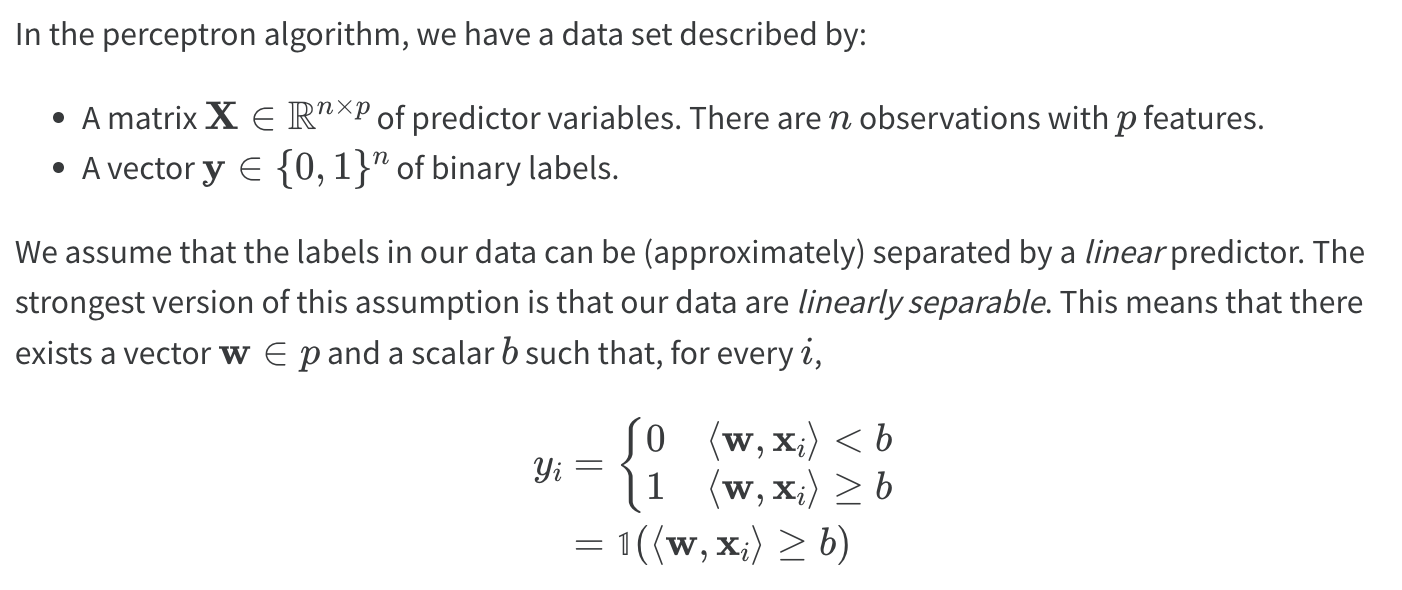

The source code containing my implementation of the perceptron algorithm can be found here: 

This source code contains three primary functions: fit, predict, and score. Fit is the primary method of the perceptron, and is the one that actually performs the update. This function initializes a random initial weight vector and then until convergence, picks a random index, and updates the algorithm. Predict and score compare the labels predicted by the update with the true labels provided, and calculate the algorithm's accuracy at each time stamp.  

This blog post exemplifies the perceptron algorithm using three different examples: linearly seperable data in 2 dimensions, non-linearly seperable data in 2 dimensions, and data in 5 dimensions. 

Before beginning, import all necessary packages 

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

### Experiment one: lineraly seperable 2D data.

In this example, the perceptron algorithm converges, indicating that the data set is linearly seperable and can be divided well by a certain line. 

#### Visualizing the data

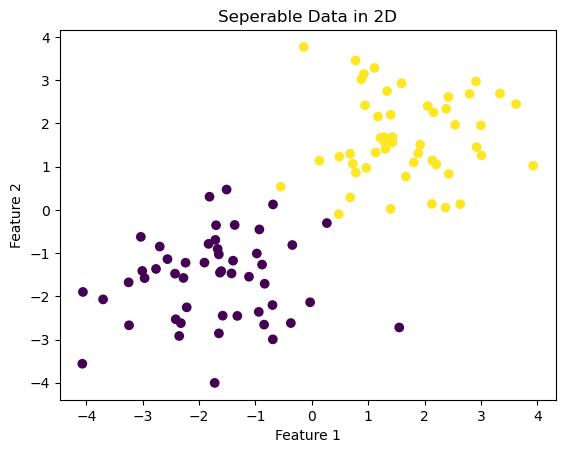

In [101]:
np.random.seed(12345)

n = 100 
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.title("Seperable Data in 2D")

#### Create an instance of Perceptron from source code and fit it to the data

In [102]:
from perceptron import Perceptron #import class from .py file


#create an instance of the class and fit it to data.
p = Perceptron()
p.fit(X, y, max_steps = 1000)

p.w
print("Accuracy of the last 10 timestamps of the perceptron:")
print(p.history[-10:]) #just the last few values


Accuracy of the last 10 timestamps of the perceptron:
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


#### Visualizing Accuracy over time 

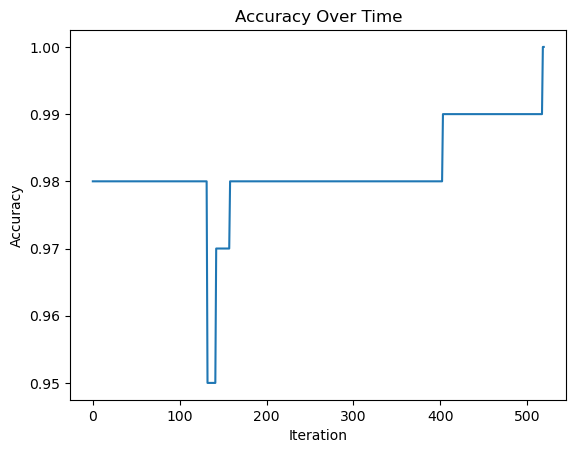

In [120]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy Over Time")

#### Visualizing the separating line

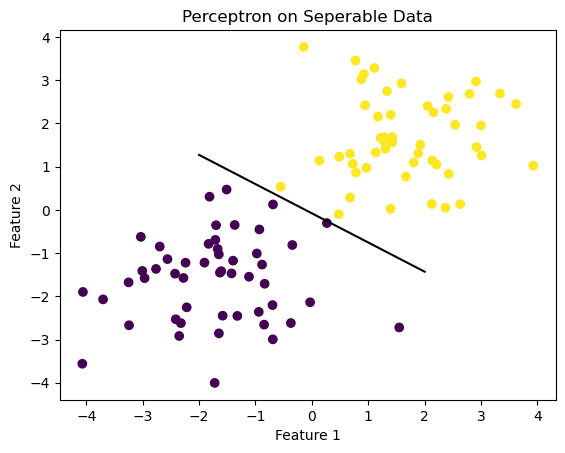

In [115]:
def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.title("Perceptron on Seperable Data")

#### Ensure that the final accuracy is 1 for converging perceptron

In [105]:
p.score(X, y)

1.0

### Experiment two: not lineraly seperable 2D data

In this example, the perceptron algorithm will not converge or settle on a final value, but will run until the specified maximum number of iterations is reached. In this example, the algorithm will not reach perfect accuracy. 

#### Visualizing the data

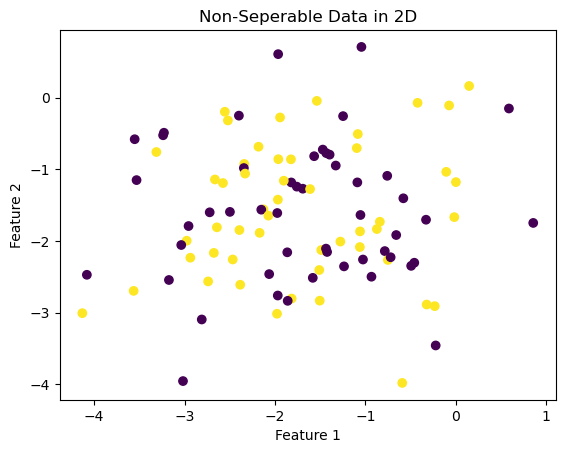

In [116]:
X2, y2 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (-1.7, -1.7)])

fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
xlab2 = plt.xlabel("Feature 1")
ylab2 = plt.ylabel("Feature 2")
title = plt.title("Non-Seperable Data in 2D")

#### Create a new instance of Perceptron and fit to data

In [108]:
from perceptron import Perceptron

#create an instance of the class and fit it to data.
p2 = Perceptron()
p2.fit(X2, y2, max_steps = 1000)

p2.w
print("Accuracy of the last 10 timestamps of the perceptron:")
print(p2.history[-10:]) 


Accuracy of the last 10 timestamps of the perceptron:
[0.58, 0.58, 0.5, 0.5, 0.48, 0.48, 0.5, 0.49, 0.49, 0.47]


#### Visualize how the accuracy changes over time 

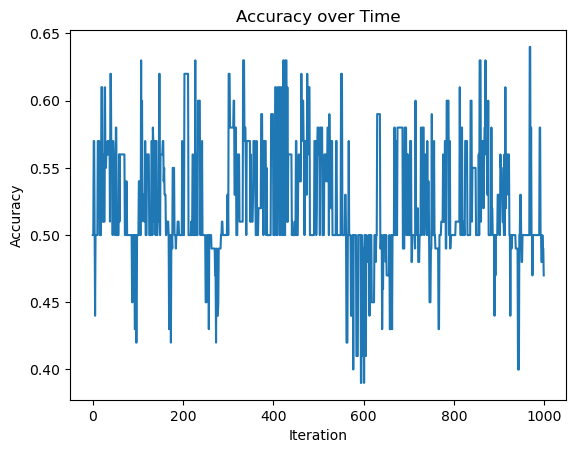

In [117]:
#visualize how the score evolved over time
fig = plt.plot(p2.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy Over Time")

#### Visualizing the separator in the final iteration

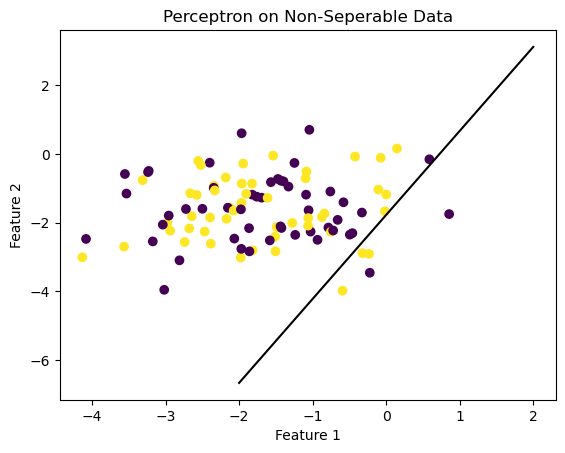

In [118]:
#visualize the line that the algorithm finds to separate the data

fig = plt.scatter(X2[:,0], X2[:,1], c = y2)
fig = draw_line(p2.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.title("Perceptron on Non-Seperable Data")

Here, the seperating line is far from perfect. The line simply falls on whichever point was selected in the final iteration of the algorithm. 

### Experiment three: perceptron in multiple dimensions

In this experiment, the algorithm will run on 5 features and then evaluate whether or not the data is linearly separable. 

In [111]:
p_features3 = 6

X3, y3 = make_blobs(n_samples = 100, n_features = p_features3 - 1, centers = [(-1.7,-1.7), (1.7,1.7)])

#### Create new instance of Perceptron and fit to data


In [112]:
from perceptron import Perceptron 

#create an instance of the class and fit it to data.
p3 = Perceptron()
p3.fit(X3, y3, max_steps = 1000)

p3.w
print(p3.history[-10:]) #just the last few values

[0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 1.0]


#### Visualize how the accuracy changes over time 

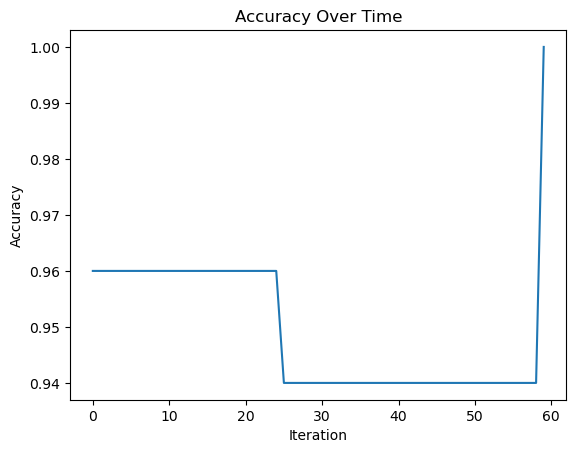

In [119]:
#visualize how the score evolved over time
fig = plt.plot(p3.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy Over Time")


In this example, the perceptron converges and does so realtively quickly. The data originates from the data in Example 1, which was linearly seperable in 2 dimensions. Given that, the data should still be seperable in 5. 

### Runtime

The runtime complexity of the perceptron algorithm is dependent on the number of features p the data has, but not with the number of points n for a single iteration of the perceptron algorithm. 